In [53]:
import random
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [54]:
#custom tokenizer for URLs. 
#first split - "/"
#second split - "-"
#third split - "."
#remove ".com" (also "http://", but we dont have "http://" in our dataset)
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens = []
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokensByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

#function to remove "http://" from URL
def trim(url):
    return re.match(r'(?:\w*://)?(?:.*\.)?([a-zA-Z-1-9]*\.[a-zA-Z]{1,}).*', url).groups()[0]


In [55]:
df = pd.read_csv(r'C:\Users\Kephas\Desktop\moretraining\dataset.csv',',',error_bad_lines=False)
df=df.sample(frac=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Lable
0,http://www.seaboardwine.com/,0
1,http://plus.maths.org/content/os/issue14/news/...,0
2,http://www.greentea.com/,0
3,http://www.indiaeducation.net/,0
4,http://dailytourantalya.net/tescobank.verifica...,1


In [56]:
#displaying 5 records 
len(df) 

7030

In [57]:
#data['url'].values
x = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [58]:
#convert it into numpy array and shuffle the dataset
df = np.array(df)
random.shuffle(df)

In [59]:
#convert text data into numerical data for machine learning models
y = [d[1] for d in df]
corpus = [d[0] for d in df]
vectorizer = TfidfVectorizer(tokenizer=getTokens)
X = vectorizer.fit_transform(corpus)

In [60]:
#split the data set inot train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [61]:
#prepare the model
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
#make model prediction for the testing class
y_pred_class = NB.predict(X_test)
print("Accuracy for Naive bayse",NB.score(X_test, y_test))


Accuracy for Naive bayse 0.9615931721194879


In [63]:
predicted = NB.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(cm)

print("False positive rate : %.2f %%" % ((cm[0][1] / float(sum(cm[0])))*100))
print('False negative rate : %.2f %%' % ( (cm[1][0] / float(sum(cm[1]))*100)))

[[1686   33]
 [ 102 1694]]
False positive rate : 1.92 %
False negative rate : 5.68 %


In [64]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1719
          1       0.98      0.94      0.96      1796

avg / total       0.96      0.96      0.96      3515



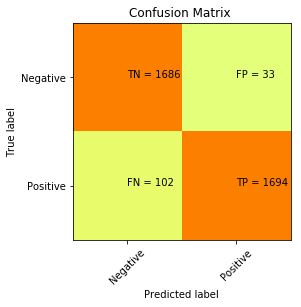

In [65]:
# Plot with Labels
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix ')

#sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
classNames = ['Negative','Positive']
plt.xlabel('Predicted label')
# Set y-axis label
plt.ylabel('True label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()